# US Police Killings

## 1. Introduction: Understanding Patterns in US Police Shootings

The dataset under investigation captures a comprehensive snapshot of incidents where every individual died through police shootings in the United States. Each record includes critical information such as the unique identifier, individual's name, date of the incident, manner of death, details about the individual's behavior, demographic details, location (city and state), and additional factors such as signs of mental illness, perceived threat level, means of arming, and whether the incident involved the use of body cameras.

In delving into this dataset, the aim is to discern patterns, trends, and key insights surrounding these incidents. By analyzing the circumstances surrounding police shootings, I seek to shed light on potential correlations between various factors, such as race, age, and armed status, and understand how they might contribute to the outcomes of these encounters. Additionally, I will explore the prevalence of signs of mental illness, the perceived threat level, and the prevalence of body camera usage.

This analysis holds the potential to contribute valuable insights into the complex dynamics of police encounters, providing a basis for informed discussions around law enforcement practices, public safety, and potential areas for reform. It is important to approach this exploration with sensitivity to the gravity of the subject matter, recognizing the real-world implications of the data we are examining.

As we navigate through the dataset, let us strive to gain a nuanced understanding of the factors at play in police shootings, fostering a data-driven dialogue that contributes to the broader conversation surrounding law enforcement practices and societal safety.


![Image of Police Officer](https://cdn2.vectorstock.com/i/1000x1000/01/31/sketch-of-a-police-cap-vector-8910131.jpg)



# 2. Methods
## 2.1 Data Collection
This data was taken from [Kaggle](https://www.kaggle.com/datasets/ahsen1330/us-police-shootings), a data science competition platform and online community of data scientists and machine learning practitioners.



In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#Load data
shootings = pd.read_csv("shootings.csv")

shootings.tail(10)

,id,name,date,manner_of_death,armed,age,age(cleaned),gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,Unnamed: 16,Unnamed: 17,Unnamed: 18
4885,5908,Jarrid Hurst,2020-06-07,shot,knife,35.0,35.0,M,White,Industry,CA,True,other,Not fleeing,False,Sharp objects,NaN,NaN,NaN
4886,5911,Lewis Ruffin,2020-06-09,shot,gun,38.0,38.0,M,Black,Orlando,FL,False,attack,Other,False,Guns,NaN,NaN,NaN
4887,5913,Gregorio Cruz Vanloo,2020-06-11,shot,gun,28.0,28.0,M,White,DeKalb County,TN,False,other,Other,False,Guns,NaN,NaN,NaN
4888,5914,Mason James Lira,2020-06-11,shot,gun,26.0,26.0,M,White,Paso Robles,CA,True,attack,Foot,False,Guns,NaN,NaN,NaN
4889,5915,Michael Thomas,2020-06-11,shot,unknown,62.0,62.0,M,Black,Lancaster,CA,False,undetermined,Not fleeing,False,Unknown,NaN,NaN,NaN
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices,NaN,NaN,NaN
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns,NaN,NaN,NaN
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed,NaN,NaN,NaN
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns,NaN,NaN,NaN
4894,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,31.0,M,White,Lawrence,KS,False,attack,Car,False,Guns,NaN,NaN,NaN


## 2.2 Data Cleaning

In analyzing the US police shootings dataset, a new 'age(cleaned)' column was introduced to resolve inconsistencies in the original 'age' column. After converting problematic string values to numerical format, the original 'age' column was dropped, and 'age(cleaned)' was renamed to 'age.' 

The floating-point precision of the 'age' column was adjusted to two decimal places for enhanced clarity in age-related analyses. These steps ensure a streamlined dataset for uncovering patterns and insights in US police shootings.

In [2]:
#setting the floating point precision and reworking the columns
pd.set_option('display.precision', 2)
columns_to_drop = ['age', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18']
shootings = shootings.drop(columns=columns_to_drop)
shootings.rename(columns={'age(cleaned)': 'age'}, inplace = True)


shootings.describe()

,id,age
count,4895.00,4895.00
mean,2902.15,36.55
std,1683.47,12.69
min,3.00,6.00
25%,1441.50,27.00
50%,2847.00,35.00
75%,4352.50,45.00
max,5925.00,91.00


# 3.Analysis
<a id='age_reference'></a>
In our next phase of exploration with this dataset, our objective is to unravel patterns, trends, and critical insights associated with police incidents. We will delve into the details surrounding police shootings, aiming to illuminate potential correlations among factors like race, age, and armed status to gain a deeper understanding of their impact on outcomes. Our analysis will extend to investigating the prevalence of signs of mental illness, evaluating perceived threat levels, and examining the frequency of body camera usage.



## 3.1 Distributions





Text(0.5, 1.0, 'Distribution of Ages in Police Shootings')

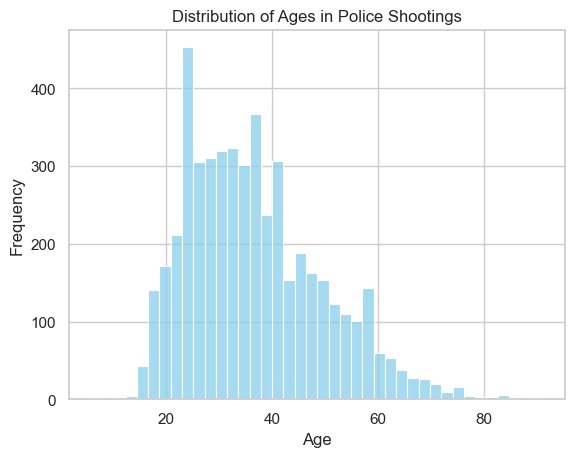

In [3]:
#Age Distribution

sns.set(style="whitegrid")
sns.histplot(shootings['age'], bins=40, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages in Police Shootings')

#frequency = shootings['age'].value_counts()
#print(frequency)



gender
M    4673
F     222
Name: count, dtype: int64


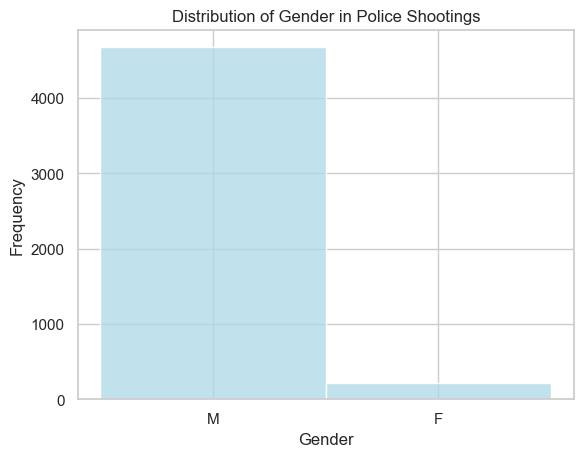

In [4]:
#Gender Distribution
sns.histplot(shootings['gender'], bins=2, color='lightblue')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender in Police Shootings')
frequency = shootings['gender'].value_counts()
print(frequency)

signs_of_mental_illness
0    3792
1    1103
Name: count, dtype: int64


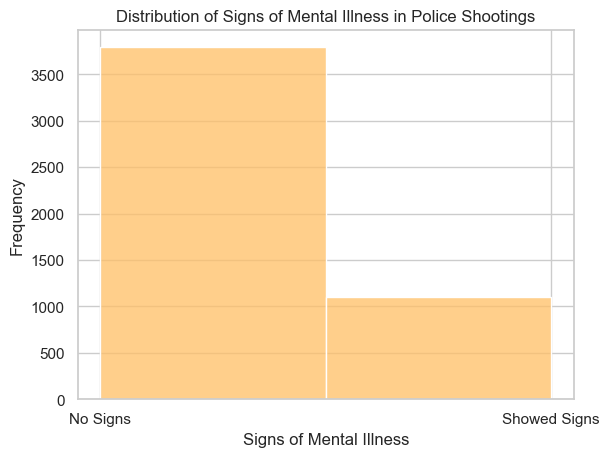

In [5]:
#Signs of Mental Illness Distribution
shootings['signs_of_mental_illness'] = shootings['signs_of_mental_illness'].astype(int)
sns.histplot(shootings['signs_of_mental_illness'], bins=2, color='#FFBF65')
plt.xlabel('Signs of Mental Illness')
plt.ylabel('Frequency')
plt.title('Distribution of Signs of Mental Illness in Police Shootings')

plt.xticks(ticks=range(2), labels=["No Signs","Showed Signs"])

frequency = shootings['signs_of_mental_illness'].value_counts()
print(frequency)

body_camera
0    4317
1     578
Name: count, dtype: int64


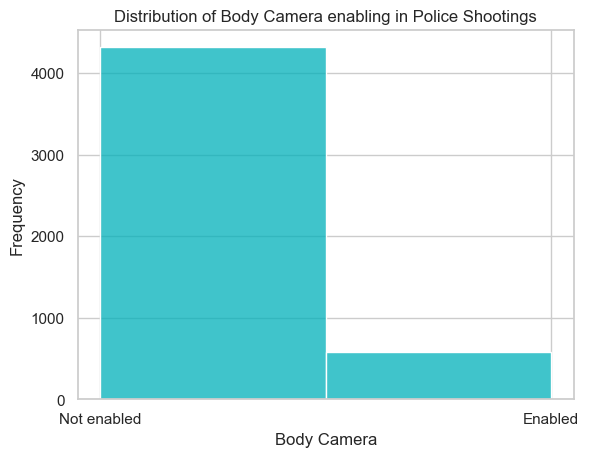

In [6]:
#Body Camera Distribution
shootings['body_camera'] = shootings['body_camera'].astype(int)
sns.histplot(shootings['body_camera'], bins=2, color='#00B0BA')
plt.xlabel('Body Camera')
plt.ylabel('Frequency')
plt.title('Distribution of Body Camera enabling in Police Shootings')

plt.xticks(ticks=range(2), labels=["Not enabled","Enabled"])

frequency = shootings['body_camera'].value_counts()
print(frequency)

race
White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: count, dtype: int64


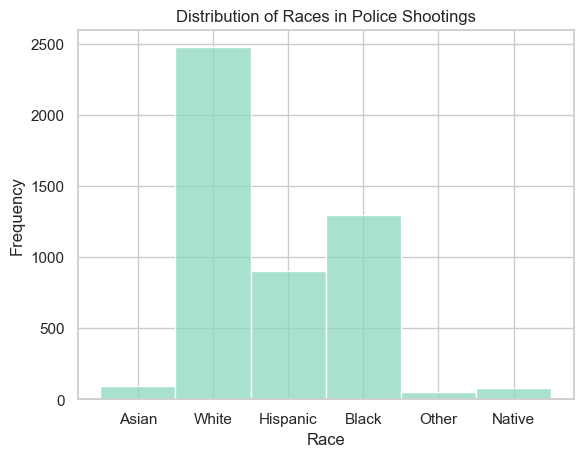

In [7]:
#Race Distribution
sns.histplot(shootings['race'], bins=30, color='#8DD7BF')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.title('Distribution of Races in Police Shootings')
frequency = shootings['race'].value_counts()
print(frequency)

arms_category
Guns                     2764
Sharp objects             818
Unknown                   418
Unarmed                   348
Other unusual objects     192
Blunt instruments         122
Vehicles                  121
Multiple                   54
Piercing objects           29
Electrical devices         24
Explosives                  4
Hand tools                  1
Name: count, dtype: int64


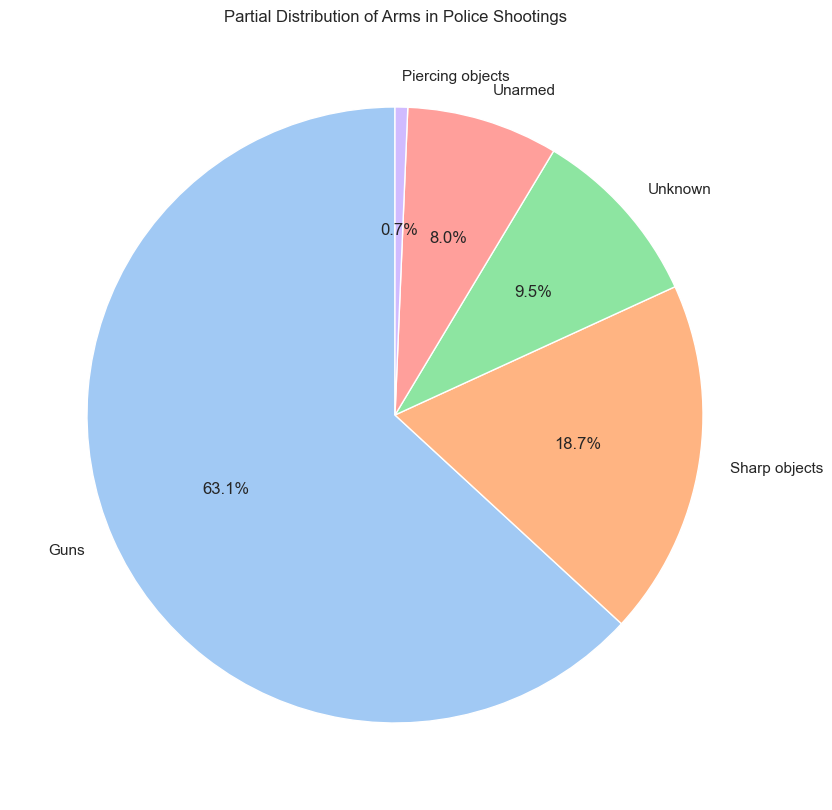

In [8]:
#Arms Distribution
selected_arms = ['Guns', 'Unarmed', 'Sharp objects', 'Piercing objects','Unknown']
filtered_data = shootings[shootings['arms_category'].isin(selected_arms)]

counts = filtered_data['arms_category'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Partial Distribution of Arms in Police Shootings')

frequency = shootings['arms_category'].value_counts()
print(frequency)

## 3.2  Signs of Mental Illness and Armament


**Summarised data with Mental Illness and Armament:**

 Showed signs of mental illness and unarmed :68 (6.18%)
 
 Showed signs of mental illness and armed with gun :540 (49.01%)
 
 No signs of mental illness and unarmed :280 (7.39%)
 
 No signs of mental illness and armed with gun :2224 (58.65%)
 
 **Armed with a Gun:**
 
 A significant proportion of encounters involve individuals, irrespective of mental health indicators, being armed with guns, with percentages ranging from 49.01% to 58.65%.
 
 **Unarmed:**
 
 The percentage of individuals being unarmed during encounters is comparatively lower, ranging from 6.18% to 7.39%.
 
 **Inferences:**
 
 The data highlights a notable prevalence of firearms in police encounters, especially when individuals are not showing signs of mental illness.
 
Understanding the distribution across armed and unarmed categories provides insights for law enforcement practices and mental health interventions, emphasizing the need for nuanced strategies in different scenarios.
 




In [9]:
#calculating the intersection of mental illness and being armed with a gun or not
trend1 = {"Showed signs of mental illness and unarmed":shootings[(shootings.signs_of_mental_illness== True)
          & (shootings.arms_category == 'Unarmed')],
          "Showed signs of mental illness and armed with gun":shootings[(shootings.signs_of_mental_illness== True)
          & (shootings.arms_category == 'Guns')],
          "No signs of mental illness and unarmed":shootings[(shootings.signs_of_mental_illness== False)
          & (shootings.arms_category == 'Unarmed')],
          "No signs of mental illness and armed with gun":shootings[(shootings.signs_of_mental_illness== False)
          & (shootings.arms_category == 'Guns')]
         }

print(f" Showed signs of mental illness and unarmed :{trend1['Showed signs of mental illness and unarmed'].shape[0]}\n",
     f"Showed signs of mental illness and armed with gun :{trend1.get('Showed signs of mental illness and armed with gun').shape[0]}\n",
     f"No signs of mental illness and unarmed :{trend1.get('No signs of mental illness and unarmed').shape[0]}\n",
     f"No signs of mental illness and armed with gun :{trend1.get('No signs of mental illness and armed with gun').shape[0]}\n")

arms = ['Guns','Unarmed']
filtered_data = shootings[shootings['arms_category'].isin(arms)]
grouped_data = filtered_data.groupby(['arms_category','signs_of_mental_illness',]).size().unstack()
grouped_data

 Showed signs of mental illness and unarmed :68
 Showed signs of mental illness and armed with gun :540
 No signs of mental illness and unarmed :280
 No signs of mental illness and armed with gun :2224



signs_of_mental_illness,0,1
arms_category,,
Guns,2224,540
Unarmed,280,68


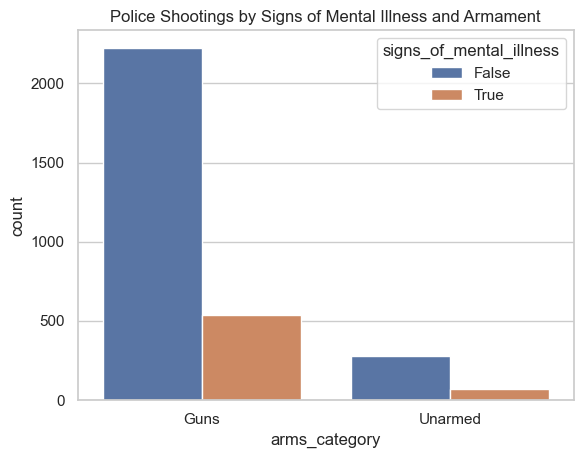

In [10]:
p = sns.countplot(data=filtered_data, x="arms_category", hue="signs_of_mental_illness",hue_order=[False,True]).set(title='Police Shootings by Signs of Mental Illness and Armament')

## 3.3 Top Three States and Armament

**Summarised data from top three states with the highest shootings:**

Occurred in California and unarmed: 57 (8.13%)

Occurred in California and armed with a gun: 295 (42.08%)

Occurred in Texas and unarmed: 38 (8.92%)

Occurred in Texas and armed with a gun: 254 (59.62%)

Occurred in Florida and unarmed: 27 (8.33%)

Occurred in Florida and armed with a gun: 183 (56.48%)

Based on the above data:

**Armed with a Gun**:

Across all states (California, Texas, and Florida), a substantial proportion of police encounters involved individuals armed with guns. The percentages range from approximately 42% to 59.62% within specific states.

**Unarmed:**

The percentage of individuals who were unarmed during police encounters is lower, ranging from approximately 8.13% to 8.92% within specific states.

**Inferences:**

The analysis indicates a notable prevalence of firearms in police encounters, with a higher percentage of individuals being armed with guns.
The relatively lower percentages of unarmed incidents suggest that, in a significant majority of cases, individuals involved in police encounters are armed with firearms.
Understanding the dynamics between armament status and the outcomes of police encounters is crucial for policymakers and law enforcement agencies to develop targeted strategies, training, or interventions to address the complex challenges associated with armed incidents.

In [11]:
#calculating the intersection of top three states with highest police shootings  and being armed with a gun or not
trend2 = {"Occured in California and unarmed":shootings[(shootings.state== "CA")
          & (shootings.arms_category == 'Unarmed')],
          "Occured in California and armed with gun":shootings[(shootings.state== "CA")
          & (shootings.arms_category == 'Guns')],
          "Occured in Texas and unarmed":shootings[(shootings.state== "TX")
          & (shootings.arms_category == 'Unarmed')],
          "Occured in Texas and armed with gun":shootings[(shootings.state== "TX")
          & (shootings.arms_category == 'Guns')],
           "Occured in Florida and unarmed":shootings[(shootings.state== "FL")
          & (shootings.arms_category == 'Unarmed')],
          "Occured in Florida and armed with gun":shootings[(shootings.state== "FL")
          & (shootings.arms_category == 'Guns')]
         }
print(f" Occured in California and unarmed :{trend2['Occured in California and unarmed'].shape[0]}\n",
     f"Occured in California and armed with gun :{trend2.get('Occured in California and armed with gun').shape[0]}\n",
     f"Occured in Texas and unarmed:{trend2.get('Occured in Texas and unarmed').shape[0]}\n",
     f"Occured in Texas and armed with gun :{trend2.get('Occured in Texas and armed with gun').shape[0]}\n",
     f"Occured in Florida and unarmed:{trend2.get('Occured in Florida and unarmed').shape[0]}\n",
     f"Occured in Florida and armed with gun :{trend2.get('Occured in Florida and armed with gun').shape[0]}\n")
states = ['CA', 'TX', 'FL']
arms = ['Guns','Unarmed']
filtered_data = shootings[shootings['state'].isin(states) & shootings['arms_category'].isin(arms)]

grouped_data = filtered_data.groupby(['arms_category','state',]).size().unstack()
grouped_data

 Occured in California and unarmed :57
 Occured in California and armed with gun :295
 Occured in Texas and unarmed:38
 Occured in Texas and armed with gun :254
 Occured in Florida and unarmed:27
 Occured in Florida and armed with gun :183



state,CA,FL,TX
arms_category,,,
Guns,295,183,254
Unarmed,57,27,38


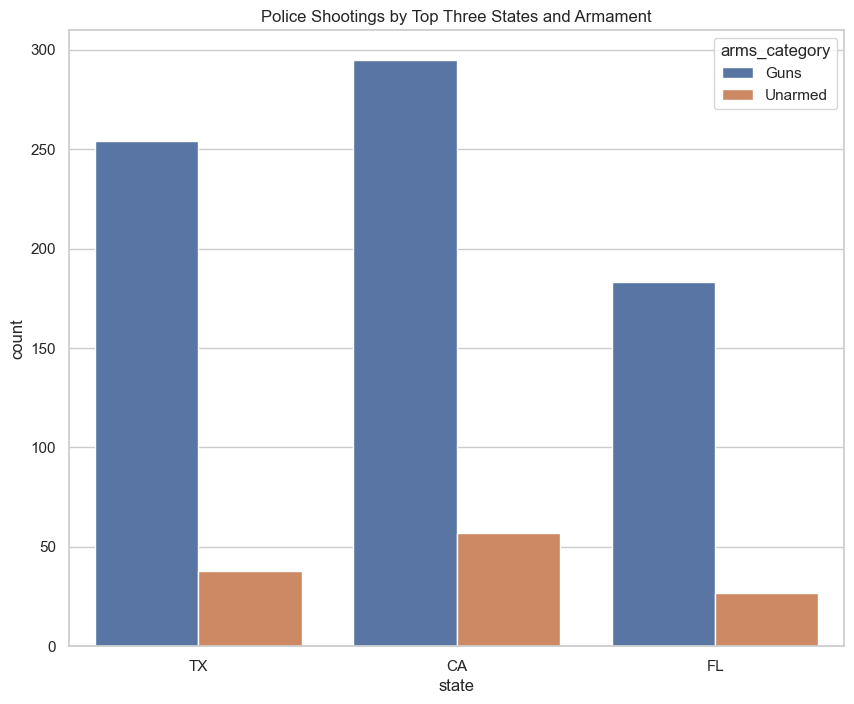

In [12]:
plt.figure(figsize=(10, 8))
p = sns.countplot(data=filtered_data, x="state", hue="arms_category").set(title='Police Shootings by Top Three States and Armament')

## 3.4 Threat level, Armament and Fleeing


**Inferences:** 

**Guns are the Most Commonly Used Arms Category:** 

The 'Guns' arms category stands out as the most prevalent in various threat levels, with significantly higher counts compared to other arms categories.


**Fleeing Methods Vary Across Threat Levels:**

For different arms categories, the choice of fleeing method varies across threat levels. For example, the use of 'Car' as a fleeing method is more common in the 'attack' threat level compared to other threat levels.


**Not Fleeing is a Common Response:**

In many cases, a significant number of incidents involve the individuals not fleeing, regardless of the arms category and threat level.


**Undetermined Cases:**

There are instances marked as 'undetermined' in the fleeing methods, suggesting that the specific fleeing method is unknown or not explicitly documented in those cases.


**Some Arms Categories Are More Associated with Certain Threat Levels:**

Certain arms categories, such as 'Guns', are more prevalent in the 'attack' threat level compared to other threat levels.


**Variability in Data Completeness:**

Some entries have NaN values, indicating missing or unavailable data for certain combinations of arms category, threat level, and fleeing method.

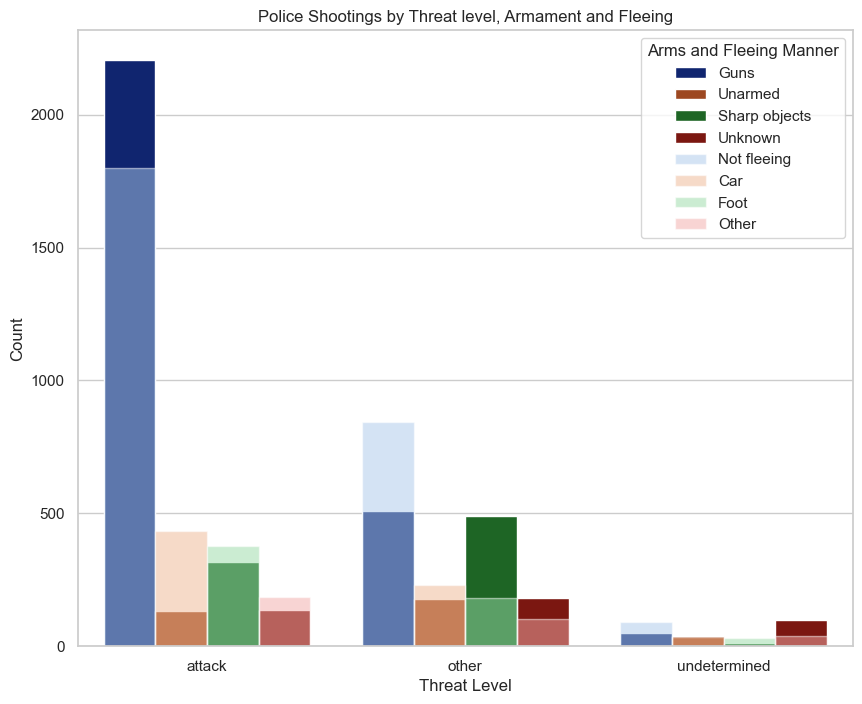

flee                                  Car   Foot  Not fleeing  Other
arms_category         threat_level                                  
Blunt instruments     attack          2.0    7.0         42.0    3.0
                      other           4.0    5.0         50.0    5.0
                      undetermined    NaN    NaN          4.0    NaN
Electrical devices    attack          1.0    3.0         12.0    4.0
                      other           NaN    NaN          4.0    NaN
Explosives            attack          NaN    NaN          1.0    NaN
                      other           NaN    NaN          2.0    1.0
Guns                  attack        332.0  310.0       1404.0  161.0
                      other          69.0   90.0        301.0   49.0
                      undetermined    5.0   15.0         20.0    8.0
Hand tools            other           NaN    NaN          1.0    NaN
Multiple              attack         17.0    7.0         10.0    4.0
                      other           NaN    NaN         15.0    1.0
Other unusual objects attack          8.0   15.0        111.0    7.0
                      other           2.0    8.0         34.0    2.0
                      undetermined    NaN    3.0          2.0    NaN
Piercing objects      attack          2.0    1.0         11.0    1.0
                      other           NaN    1.0         12.0    1.0
Sharp objects         attack         11.0   25.0        269.0   11.0
                      other          23.0   47.0        390.0   30.0
                      undetermined    NaN    NaN          9.0    3.0
Unarmed               attack          6.0   35.0         85.0    7.0
                      other          54.0   32.0         83.0    7.0
                      undetermined    7.0    8.0         19.0    5.0
Unknown               attack         83.0    7.0         42.0    6.0
                      other          84.0   11.0         69.0   17.0
                      undetermined   22.0    8.0         45.0   24.0
Vehicles              attack         71.0    4.0         20.0    2.0
                      other          17.0    NaN          6.0    1.0

In [13]:
#calculates the top 4 values by count in the arms_category column
top_arms = shootings['arms_category'].value_counts().nlargest(4).index
filtered_data = shootings[shootings.arms_category.isin(top_arms)]

plt.figure(figsize=(10, 8))
sns.countplot(data=filtered_data, x='threat_level', hue='arms_category', palette='dark', alpha=1)
sns.countplot(data=filtered_data, x='threat_level', hue='flee', palette='pastel', alpha=0.5)
plt.title('Police Shootings by Threat level, Armament and Fleeing')
plt.xlabel('Threat Level')
plt.ylabel('Count')
plt.legend(title='Arms and Fleeing Manner', loc='upper right')
plt.show()

grouped_data = shootings.groupby(['arms_category','threat_level','flee']).size().unstack()
pd.set_option('display.max_rows', None)
grouped_data



## 3.5 State and Armament

**Inferences**

**Guns Predominate Across States:**

The 'Guns' arms category is the most prevalent across all top states, indicating that firearms are the most commonly used weapon in police incidents.

**Variation in Armament Across States:**

Different states show varying counts across arms categories, reflecting potential regional differences in the types of weapons involved in police incidents.

**California (CA) and Texas (TX) Lead in Armament Incidents:**

California and Texas consistently have higher counts across most arms categories, suggesting a higher incidence of police encounters involving various types of weapons.


**Unarmed Incidents Across States:**

The 'Unarmed' category has notable counts across multiple states, emphasizing the occurrence of police incidents where individuals are not armed.

**Unknown Armament in California (CA) and Texas (TX):**

California and Texas also have higher counts in the 'Unknown' arms category, which may indicate cases where the specific details of the arms used are not well-documented or unclear.

**Some States Show Specific Preferences in Armament:**

For example, California (CA) has relatively higher counts in the 'Other unusual objects' arms category, suggesting the involvement of unconventional objects in police incidents.

.

arms_category,Guns,Other unusual objects,Sharp objects,Unarmed,Unknown
state,,,,,
AZ,126,10,36,16,19
CA,295,46,165,57,72
CO,109,4,20,9,16
FL,183,12,58,27,25
GA,97,10,18,15,10
NC,105,4,19,4,10
OH,82,10,25,13,9
OK,83,1,29,14,8
TX,254,13,60,38,27


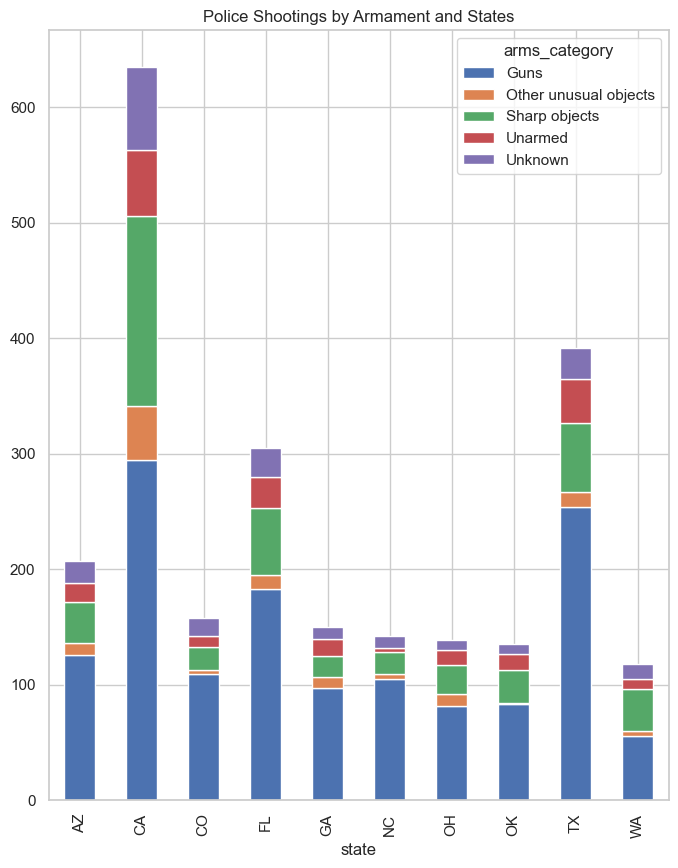

In [14]:
#calculates the top 10 values by count in the state column
selected_states = shootings['state'].value_counts().nlargest(10).index

#calculates the top 5 values by count in the arms_category column
selected_arms =  shootings['arms_category'].value_counts().nlargest(5).index

filtered_data = shootings[shootings['state'].isin(selected_states) & shootings['arms_category'].isin(selected_arms) ]

grouped_data2 = filtered_data.groupby(['state','arms_category']).size().unstack()
grouped_data2.plot.bar(stacked=True, figsize = [8,10], title = "Police Shootings by Armament and States")

grouped_data2

## 3.6 Age and Gun armament
[Click here to refer to Age Distribution Plot](#age_reference)


**Age Distribution:**
The age distribution appears to be right-skewed, with a peak around the ages of 25 to 35.
There's a noticeable spike at the age of 37.12, which might be an outlier or an artifact in the data. It was also the data value that had an apostrophe attached to it's start which needed to be fixed before I began working with the dataset.
The distribution covers a wide range of ages, from as young as 6 to as old as 91.

**Age Distribution for "Guns" Arms Category:**
The distribution of ages for the "Guns" arms category roughly follows the overall age distribution.
The highest counts in the "Guns" category are observed in the age range of 31 to 34.
The age of 37.12, which had a spike in the overall distribution, also has a relatively high count in the "Guns" category.
Generally, the distribution suggests that encounters involving firearms (Guns) are spread across a wide range of ages, but there's a concentration in the 20s to 30s age range.

**Similarities:**
The overall age distribution and the age distribution for the "Guns" category show similarities, indicating that encounters that resulted in deaths are strongly correlated to the victim carrying their own  firearm.

**Considerations:**
The specific nature of these encounters and the reasons behind the use of firearms would require further context and analysis.
Outliers, such as the age of 37.12, may need to be investigated for data integrity.


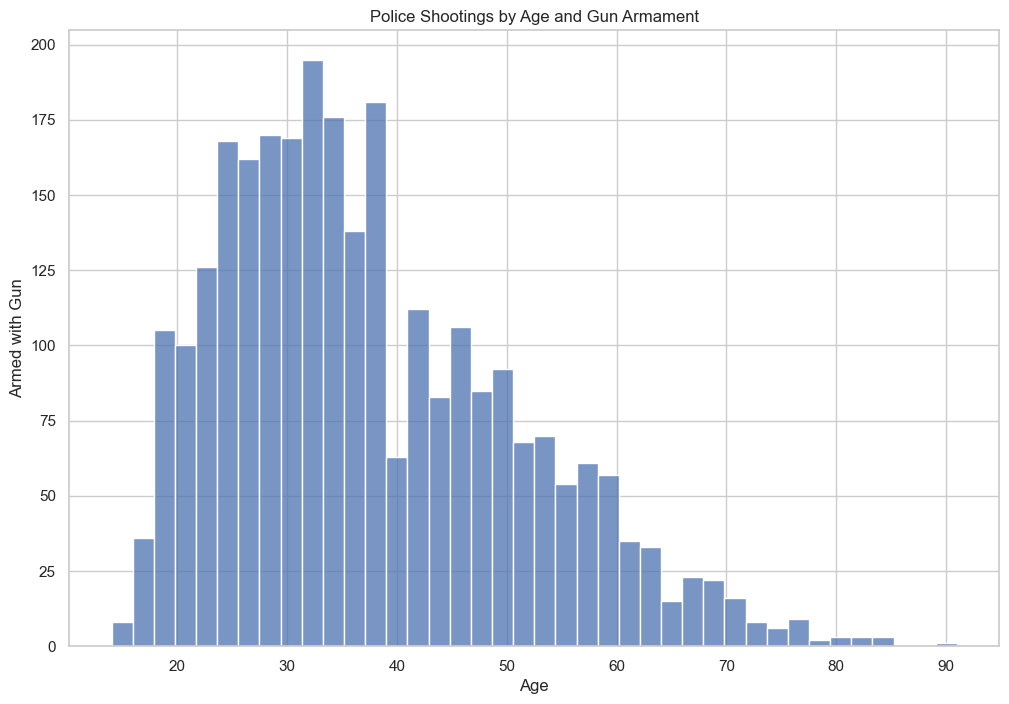

In [15]:
selected_arms = ["Guns"]
filtered_data = shootings[shootings.arms_category.isin(selected_arms)]

plt.figure(figsize=(12, 8))
sns.histplot(data=filtered_data, x ='age', bins = 40)
plt.title('Police Shootings by Age and Gun Armament')
plt.xlabel('Age')
plt.ylabel('Armed with Gun')
plt.show()






In [16]:
grouped_data1 = filtered_data.groupby(['age', 'arms_category']).size().unstack()
grouped_data1

arms_category,Guns
age,
14.00,1
15.00,7
16.00,12
17.00,24
18.00,59
19.00,46
20.00,44
21.00,56
22.00,56


Text(0.5, 1.0, 'Kernel Density Plot of Age Distribution and Age Distribution with Guns')

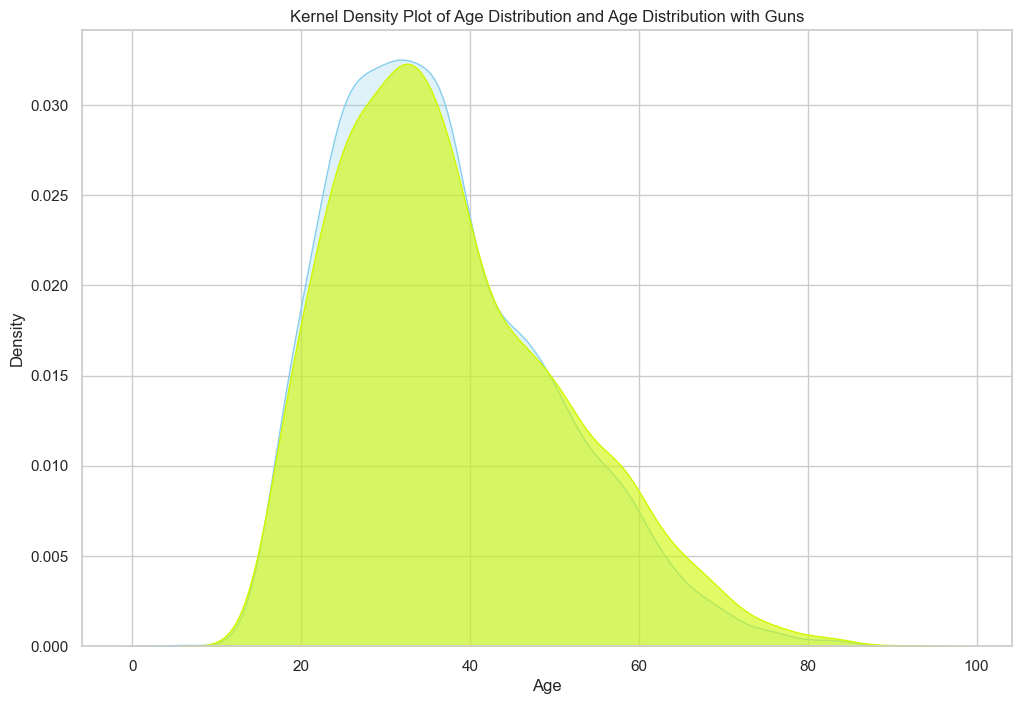

In [17]:
plt.figure(figsize=(12, 8))

sns.kdeplot(shootings['age'], fill=True, label='Overall Age Distribution', color = 'skyblue')


sns.kdeplot(filtered_data['age'], fill=True, label='Age Distribution with Guns', color = '#CFF800', alpha=0.6)


plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Age Distribution and Age Distribution with Guns')

# 4. Discussion


**Summary: Analysis of US Police Shootings**

In examining the dataset on US police shootings, several key patterns and trends have emerged:

1. **Arms Category Distribution:**
   - **Guns Dominant:** A significant proportion of police encounters involved individuals armed with guns across all states, ranging from 42% to 59.62%.  <br><br>
   

2. **Mental Health and Armament:**
   - Among those showing signs of mental illness (1103 cases), 49.01% were armed with guns. Notably, even individuals without signs of mental illness (3792 cases) exhibited a high prevalence of gun possession (58.65%).<br><br>

3. **State-wise Analysis:**
   - In California, Texas, and Florida, a higher percentage of encounters involved individuals armed with guns compared to those unarmed. For instance, in California, 42.08% were armed with guns, while 8.13% were unarmed.<br><br>

4. **Age and Armament:**
   - The analysis of age distribution revealed commonalities between the overall age distribution and the age distribution of individuals armed with guns. this indicated that the resulted in deaths are strongly correlated to the victim carrying their own  firearm.<br><br>


These findings underscore the complex interplay between demographic factors, mental health indicators, and armament status in police shootings. Understanding these patterns is crucial for shaping informed policies and interventions in law enforcement practices. 

It's important to note that these inferences are based on the provided counts and do not provide information on the context or outcomes of the incidents. 

A more comprehensive analysis, including additional contextual information, would be needed to draw more specific conclusions about the nature of these incidents in each state.

# 5. References

1. Source data - https://www.kaggle.com/datasets/ahsen1330/us-police-shootings
2. Pandas for data manipulation
3. Seaborn for data viz
4. Matplotlib for data viz
5. ChatGPT for inference summaries and syntax assistance. - https://chat.openai.com/share/4cf296cf-0611-4caf-a969-ad73663b3842